
# Diamonds.csv - MLPRegressor Hyperparameter Optimization:


#### FEDERAL UNIVERSITY OF RIO DE JANEIRO - EEL817 Neural Networks - 2020.4

#### Authors:

Ana Thais Castro (anathaiscastro at poli.ufrj.br)

Jonas Degrave (jonasdegrave at poli.ufrj.br)

## Loading Libraries and Dataset

In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, sqrt
from pandas_profiling import ProfileReport

Wall time: 1.52 s


In [2]:
arqPath = "diamonds.csv"
data = pd.read_csv(arqPath, index_col = 0)

## Exploratory Data Analysis

In [3]:
%%time
#profile = ProfileReport(data)
#profile.to_file("profile.html")

Wall time: 0 ns


In [4]:
#color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
#cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
#clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

colorsDict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
cutDict =  {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
clarityDict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

color = [colorsDict[i] for i in data['color']]
cut = [cutDict[i] for i in data['cut']]
clarity = [clarityDict[i] for i in data['clarity']]

data['cut'] = cut
data['color'] = color
data['clarity'] = clarity

In [5]:
# New variable 'volume'
data['volume'] = data['x'] * data['y'] * data['z']

In [6]:
# Excluding outliers:

data = data[(data[['x','y','z']] != 0).all(axis=1)]
data = data[(data[['y']] < 20).all(axis=1)]
data = data[(data[['z']] < 20).all(axis=1)]

In [7]:
# Linearizing price:
data['price'] = data['price'].map(log)

In [8]:
%%time
data.describe()

Wall time: 40 ms


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,3.904223,4.405939,4.051505,61.749565,57.456939,7.786369,5.731605,5.733428,3.539409,129.802460
std,0.473777,1.116593,1.701281,1.647017,1.432318,2.234069,1.014544,1.119402,1.111272,0.691620,76.450353
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,5.786897,3.730000,3.680000,1.070000,31.707984
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,6.855409,4.710000,4.720000,2.910000,65.188530
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,7.783641,5.700000,5.710000,3.530000,114.840180
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,8.579792,6.540000,6.540000,4.040000,170.844704
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,9.842835,10.740000,10.540000,6.980000,790.133208


In [9]:
%%time
# Normalization
AVG = data.mean()
STD = data.std()
dataNorm = (data-AVG)/STD

dataNorm.describe()

Wall time: 67 ms


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
count,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04,5.391700e+04
mean,4.196863e-14,-8.434211e-17,1.233503e-16,2.129638e-16,5.523612e-13,-2.290837e-14,2.777090e-13,9.923693e-14,8.225886e-14,-2.560711e-13,3.565984e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261536e+00,-2.600968e+00,-2.001984e+00,-1.852747e+00,-1.309036e+01,-6.471125e+00,-1.970809e+00,-1.788102e+00,-1.847818e+00,-3.570471e+00,-1.283113e+00
25%,-8.393963e-01,-8.098054e-01,-8.263999e-01,-6.384302e-01,-5.233230e-01,-6.521461e-01,-9.176146e-01,-9.126348e-01,-9.119537e-01,-9.100504e-01,-8.451750e-01
50%,-2.061870e-01,8.577595e-02,-2.386077e-01,-3.127175e-02,3.521209e-02,-2.045324e-01,-2.689405e-03,-2.823404e-02,-2.108253e-02,-1.360442e-02,-1.957124e-01
75%,5.114503e-01,9.813573e-01,9.369769e-01,5.758867e-01,5.239303e-01,6.906952e-01,7.820492e-01,7.221666e-01,7.258094e-01,7.237946e-01,5.368483e-01
max,8.890921e+00,9.813573e-01,1.524769e+00,2.397362e+00,1.204372e+01,1.680479e+01,2.026985e+00,4.474170e+00,4.325289e+00,4.974683e+00,8.637380e+00


In [10]:
%%time
#pairplot = sns.pairplot(dataNorm)

Wall time: 0 ns


In [11]:
dataNorm

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,-1.198215,0.981357,0.936977,-1.245589,-0.174239,-1.099760,-1.970809,-1.591569,-1.577857,-1.604073,-1.198169
2,-1.240429,0.085776,0.936977,-0.638430,-1.361126,1.585923,-1.970809,-1.645169,-1.703839,-1.777579,-1.246516
3,-1.198215,-1.705387,0.936977,0.575887,-3.385815,3.376378,-1.967790,-1.502235,-1.496869,-1.777579,-1.199806
4,-1.071573,0.085776,-1.414192,-0.031272,0.454113,0.243081,-1.946912,-1.368235,-1.352890,-1.314897,-1.086691
5,-1.029359,-1.705387,-2.001984,-1.245589,1.082465,0.243081,-1.943966,-1.243168,-1.244905,-1.141391,-1.018768
...,...,...,...,...,...,...,...,...,...,...,...
53936,-0.163973,0.981357,1.524769,-0.638430,-0.662957,-0.204532,0.133586,0.016433,0.023911,-0.056981,-0.181588
53937,-0.163973,-1.705387,1.524769,-0.638430,0.942832,-1.099760,0.133586,-0.037167,0.014912,0.102066,-0.152940
53938,-0.206187,-0.809805,1.524769,-0.638430,0.733381,1.138309,0.133586,-0.063967,-0.048079,0.029772,-0.200820
53939,0.131525,0.085776,-0.826400,-1.245589,-0.523323,0.243081,0.133586,0.373766,0.347864,0.290030,0.143409


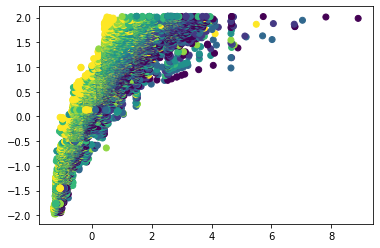

Wall time: 994 ms


In [12]:
%%time
color = dataNorm['color']
plt.scatter(dataNorm['carat'], dataNorm['price'], c=color, cmap='viridis')
plt.show()

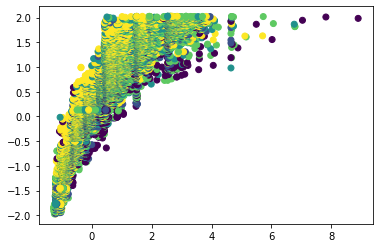

In [13]:
cut = dataNorm['cut']
plt.scatter(dataNorm['carat'], dataNorm['price'], c=cut, cmap='viridis')
plt.show()

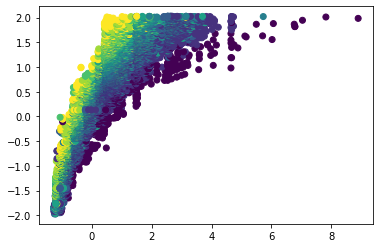

In [14]:
clarity = dataNorm['clarity']
plt.scatter(dataNorm['carat'], dataNorm['price'], c=clarity, cmap='viridis')
plt.show()

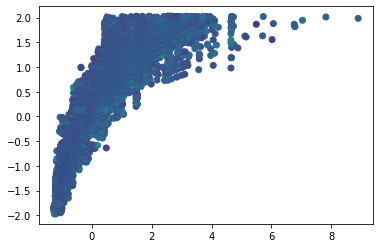

In [15]:
table = dataNorm['table']
plt.scatter(dataNorm['carat'], dataNorm['price'], c=table, cmap='viridis')
plt.show()

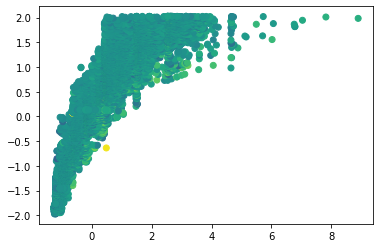

In [16]:
depth = dataNorm['depth']
plt.scatter(dataNorm['carat'], dataNorm['price'], c=depth, cmap='viridis')
plt.show()

In [17]:
%%time
# Shuffle
dataNorm = dataNorm.sample(frac=1).reset_index(drop=True)

Wall time: 6 ms


In [18]:
# x and y
y = dataNorm['price']

# Dropping 'x', 'y' and 'z'
x = dataNorm.drop(['price', 'x', 'y', 'z', 'volume'], axis=1)

In [19]:
x

,carat,cut,color,clarity,depth,table
0,-0.311722,0.981357,1.524769,1.183045,-0.732774,-0.204532
1,-1.071573,-0.809805,-0.238608,1.183045,-0.593140,-0.204532
2,2.558827,-0.809805,0.349185,-1.245589,-1.012041,1.138309
3,1.461264,0.085776,-0.826400,-0.638430,0.105029,-0.204532
4,0.638092,0.981357,-2.001984,-0.638430,-0.174239,-1.099760
...,...,...,...,...,...,...
53912,0.891376,-0.809805,0.349185,-0.638430,1.222099,-0.652146
53913,0.469236,0.085776,0.349185,-1.245589,-0.174239,0.243081
53914,-0.565006,0.981357,0.349185,1.183045,0.105029,-0.652146
53915,0.532557,0.981357,-0.238608,0.575887,0.174846,-0.652146


In [20]:
y

0        0.565939
1       -1.471548
2        1.910681
3        1.412975
4        0.592104
           ...   
53912    0.783160
53913    0.625437
53914   -0.106950
53915    1.060827
53916    0.815008
Name: price, Length: 53917, dtype: float64

**Validation Curve Plot:**

In [21]:
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    #train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    #train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    #train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
   # train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

   # train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
   # train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

**Grid Searches:**

In [22]:
%%time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

Wall time: 34 ms


In [23]:
%%time
mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', tol=1e-6, max_iter=1000, alpha=0.001, verbose=True)
mlp

Wall time: 0 ns


MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=1e-06, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [24]:
param_grid = [
    #{'solver': ['sgd', 'adam'], 'max_iter': [5000], 'tol': [1e-04], 'hidden_layer_sizes':[(32,32)]},
    #{'learning_rate_init': [0.1, 0.01, 0.001, 0.0001, 0.00001]},
    #{'activation': ['tanh', 'relu', 'logistic']},
    #{'early_stopping': [True], 'validation_fraction': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
    #{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 0.00001, 0.000001, 10, 100]},
    #{'tol': [0.0001, 0.001, 0.01, 0.1, 0.00001, 0.000001, 0.0000001, 0.00000001]},
    ##{'hidden_layer_sizes':[(200,100)], 'tol':[1e-8]}
    #{'hidden_layer_sizes':[(1), (2), (4), (8), (16), (32), (64), (128), (256), (512)]},
    #{'hidden_layer_sizes':[(1,1), (2,2), (4,4), (8,8), (16,16), (32,32), (64,64), (128,128)]}
    #{'hidden_layer_sizes':[(1,1), (2,2), (4,4), (8,8), (16,16), (32,32), (64,64), (128,128), (256,256), (512,512)]},
    #{'hidden_layer_sizes':[(1,1,1), (2,2,2), (4,4,4), (8,8,8), (16,16,16), (32,32,32), (64,64,64), (128,128,128)]},
    #{'hidden_layer_sizes':[(1,1,1,1), (2,2,2,2), (4,4,4,4), (8,8,8,8), (16,16,16,16), (32,32,32,32), (64,64,64,64), (128,128,128,128)]}
]

In [25]:
grid = GridSearchCV(mlp, param_grid, cv=10, scoring='r2', n_jobs= 5, verbose=10)

In [26]:
%%time
#result = grid.fit(x,y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    9.8s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   18.4s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   29.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   43.6s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  4.5min
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed: 10.2min remaining:    0.0s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed: 10.2min finished


Iteration 1, loss = 0.02796823
Iteration 2, loss = 0.00887864
Iteration 3, loss = 0.00814863
Iteration 4, loss = 0.00801468
Iteration 5, loss = 0.00794595
Iteration 6, loss = 0.00787664
Iteration 7, loss = 0.00780412
Iteration 8, loss = 0.00774973
Iteration 9, loss = 0.00782104
Iteration 10, loss = 0.00762762
Iteration 11, loss = 0.00751741
Iteration 12, loss = 0.00763006
Iteration 13, loss = 0.00749978
Iteration 14, loss = 0.00732469
Iteration 15, loss = 0.00730890
Iteration 16, loss = 0.00721366
Iteration 17, loss = 0.00712447
Iteration 18, loss = 0.00707850
Iteration 19, loss = 0.00701594
Iteration 20, loss = 0.00700028
Iteration 21, loss = 0.00699904
Iteration 22, loss = 0.00690979
Iteration 23, loss = 0.00684218
Iteration 24, loss = 0.00679296
Iteration 25, loss = 0.00677561
Iteration 26, loss = 0.00680070
Iteration 27, loss = 0.00675232
Iteration 28, loss = 0.00673539
Iteration 29, loss = 0.00673135
Iteration 30, loss = 0.00667900
Iteration 31, loss = 0.00661037
Iteration 32, los

In [27]:
result

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='tanh', alpha=0.001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 100),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=1000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=1e-06,
                                    validation_fraction=0.1, verbose=True,
                                    warm_start=False),
             iid='deprecated', n_jobs=5,
             param_grid=[{'hidden_lay

In [28]:
grid.best_score_

0.9898138713705279

In [29]:
grid.cv_results_

{'mean_fit_time': array([  8.77038949,   7.69478083,  13.31355844,  17.96480463,
         25.60243015,  35.6792484 ,  67.42280395, 115.78187792]),
 'std_fit_time': array([ 0.94103814,  1.93664225,  5.29458661,  7.13276775,  8.18466006,
         9.96937075, 13.55419298, 13.31227046]),
 'mean_score_time': array([0.00170176, 0.00180047, 0.00200572, 0.00320077, 0.00500085,
        0.00831139, 0.01690159, 0.03270683]),
 'std_score_time': array([4.56606613e-04, 3.99792812e-04, 1.12982235e-05, 4.00006966e-04,
        4.82171736e-07, 8.96296774e-04, 2.62323152e-03, 4.49669032e-03]),
 'param_hidden_layer_sizes': masked_array(data=[(1, 1), (2, 2), (4, 4), (8, 8), (16, 16), (32, 32),
                    (64, 64), (128, 128)],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (1, 1)},
  {'hidden_layer_sizes': (2, 2)},
  {'hidden_layer_sizes': (4, 4)},
  {'hidden_layer_sizes': (8, 8)},


In [30]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.770389,0.941038,0.001702,4.566066e-04,"(1, 1)","{'hidden_layer_sizes': (1, 1)}",0.971361,0.971055,0.971680,0.970075,0.969239,0.970124,0.970671,0.970269,0.970620,0.970892,0.970599,0.000671,8
1,7.694781,1.936642,0.001800,3.997928e-04,"(2, 2)","{'hidden_layer_sizes': (2, 2)}",0.982421,0.982098,0.982222,0.981480,0.980906,0.982072,0.981191,0.981395,0.981938,0.981870,0.981759,0.000466,7
2,13.313558,5.294587,0.002006,1.129822e-05,"(4, 4)","{'hidden_layer_sizes': (4, 4)}",0.986659,0.985723,0.985280,0.984832,0.985214,0.985943,0.985729,0.984566,0.985039,0.985568,0.985455,0.000573,6
3,17.964805,7.132768,0.003201,4.000070e-04,"(8, 8)","{'hidden_layer_sizes': (8, 8)}",0.987117,0.987732,0.987410,0.987585,0.986199,0.986495,0.988266,0.987277,0.987209,0.986960,0.987225,0.000563,5
4,25.602430,8.184660,0.005001,4.821717e-07,"(16, 16)","{'hidden_layer_sizes': (16, 16)}",0.988675,0.988173,0.989033,0.988076,0.989113,0.988142,0.988814,0.988329,0.987572,0.987837,0.988376,0.000488,4
5,35.679248,9.969371,0.008311,8.962968e-04,"(32, 32)","{'hidden_layer_sizes': (32, 32)}",0.988126,0.989794,0.989371,0.989293,0.989248,0.988918,0.989766,0.989457,0.988516,0.988259,0.989075,0.000566,3
6,67.422804,13.554193,0.016902,2.623232e-03,"(64, 64)","{'hidden_layer_sizes': (64, 64)}",0.989750,0.989672,0.988348,0.990152,0.989646,0.989329,0.989759,0.989254,0.989540,0.989348,0.989480,0.000452,2
7,115.781878,13.312270,0.032707,4.496690e-03,"(128, 128)","{'hidden_layer_sizes': (128, 128)}",0.990199,0.990189,0.989973,0.989232,0.989945,0.989750,0.990069,0.989787,0.989375,0.989621,0.989814,0.000311,1


In [31]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.770389,0.941038,0.001702,4.566066e-04,"(1, 1)","{'hidden_layer_sizes': (1, 1)}",0.971361,0.971055,0.971680,0.970075,0.969239,0.970124,0.970671,0.970269,0.970620,0.970892,0.970599,0.000671,8
1,7.694781,1.936642,0.001800,3.997928e-04,"(2, 2)","{'hidden_layer_sizes': (2, 2)}",0.982421,0.982098,0.982222,0.981480,0.980906,0.982072,0.981191,0.981395,0.981938,0.981870,0.981759,0.000466,7
2,13.313558,5.294587,0.002006,1.129822e-05,"(4, 4)","{'hidden_layer_sizes': (4, 4)}",0.986659,0.985723,0.985280,0.984832,0.985214,0.985943,0.985729,0.984566,0.985039,0.985568,0.985455,0.000573,6
3,17.964805,7.132768,0.003201,4.000070e-04,"(8, 8)","{'hidden_layer_sizes': (8, 8)}",0.987117,0.987732,0.987410,0.987585,0.986199,0.986495,0.988266,0.987277,0.987209,0.986960,0.987225,0.000563,5
4,25.602430,8.184660,0.005001,4.821717e-07,"(16, 16)","{'hidden_layer_sizes': (16, 16)}",0.988675,0.988173,0.989033,0.988076,0.989113,0.988142,0.988814,0.988329,0.987572,0.987837,0.988376,0.000488,4
5,35.679248,9.969371,0.008311,8.962968e-04,"(32, 32)","{'hidden_layer_sizes': (32, 32)}",0.988126,0.989794,0.989371,0.989293,0.989248,0.988918,0.989766,0.989457,0.988516,0.988259,0.989075,0.000566,3
6,67.422804,13.554193,0.016902,2.623232e-03,"(64, 64)","{'hidden_layer_sizes': (64, 64)}",0.989750,0.989672,0.988348,0.990152,0.989646,0.989329,0.989759,0.989254,0.989540,0.989348,0.989480,0.000452,2
7,115.781878,13.312270,0.032707,4.496690e-03,"(128, 128)","{'hidden_layer_sizes': (128, 128)}",0.990199,0.990189,0.989973,0.989232,0.989945,0.989750,0.990069,0.989787,0.989375,0.989621,0.989814,0.000311,1


In [32]:
results_pickle = results.to_pickle("results_8_log")

In [33]:
#plot_grid_search_validation_curve(grid, 'activation', log=True, ylim=(.8, 1.02))

**Plotting Results:**

In [34]:
results = grid.cv_results_

In [35]:
plt.figure(figsize=(13, 13))

<Figure size 936x936 with 0 Axes>

<Figure size 936x936 with 0 Axes>

Text(0.5, 1.0, 'Hyperparameter Optimization Evaluation')

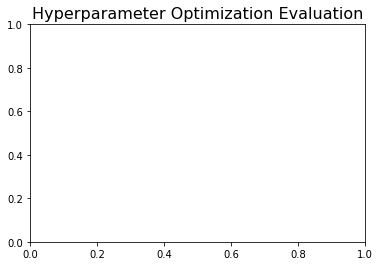

In [36]:
plt.title("Hyperparameter Optimization Evaluation",
          fontsize=16)

In [37]:
for param in param_grid:
    key = list(param.keys())[0]
    values = param[key]
    print(key)
    print(values)

hidden_layer_sizes
[(1, 1), (2, 2), (4, 4), (8, 8), (16, 16), (32, 32), (64, 64), (128, 128)]


In [38]:
parameter = 'alpha'

Text(0, 0.5, 'Score')

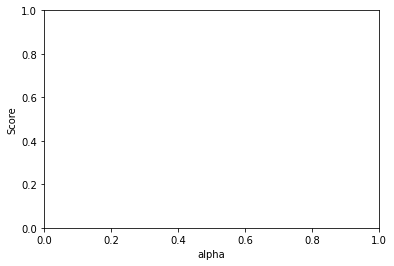

In [39]:
plt.xlabel(parameter)
plt.ylabel('Score')

(0.75, 1.02)

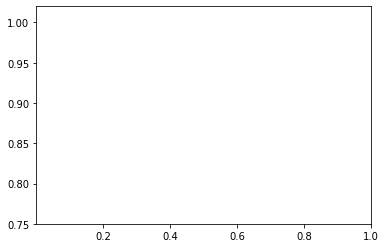

In [40]:
ax = plt.gca()
ax.set_xlim(0.001, 1)
ax.set_ylim(0.75, 1.02)

In [41]:
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

KeyError: 'param_min_samples_split'

In [ ]:
for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

In [ ]:
plt.legend(loc="best")
plt.grid(False)
plt.show()

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')